In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['gender'].unique()

array([0, 1])

In [ ]:
df= pd.get_dummies(df, columns=['country'])

In [ ]:
scaler = StandardScaler()
df[['credit_score', 'age', 'balance', 'estimated_salary']] = scaler.fit_transform(
    df[['credit_score', 'age', 'balance', 'estimated_salary']])

In [ ]:
churn_counts = df['churn'].value_counts()
churn_counts

,count
churn,
0,7963
1,2037


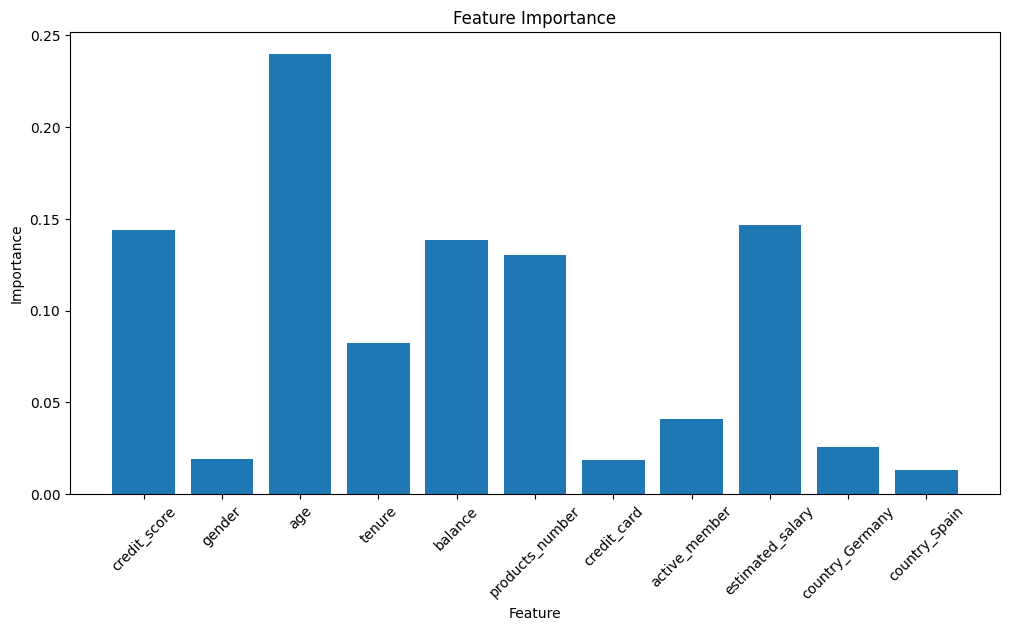

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Create 'figures' directory if it does not exist
os.makedirs("figures", exist_ok=True)

# Drop 'customer_id' if present (irrelevant for modeling)
if 'customer_id' in df.columns:
    df = df.drop('customer_id', axis=1)

# Encode 'gender' using Label Encoding
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# One-hot encode 'country' if it exists in the dataset
if 'country' in df.columns:
    df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features (X) and target variable (y)
X = df.drop("churn", axis=1)
y = df["churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance analysis
feature_importances = model.feature_importances_
feature_names = X.columns

# Plot Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.savefig("figures/feature_importance.png")

# Display feature importances
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

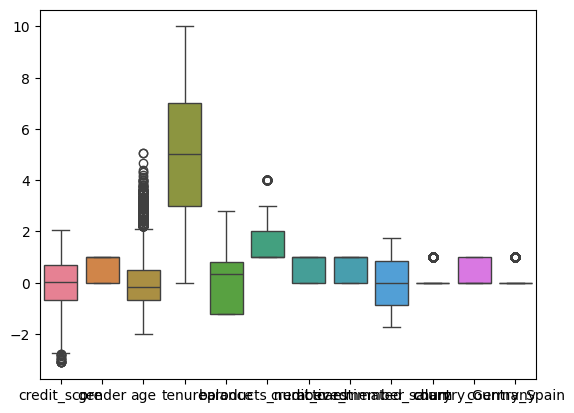

In [ ]:
sns.boxplot(data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 1500x1500 with 0 Axes>

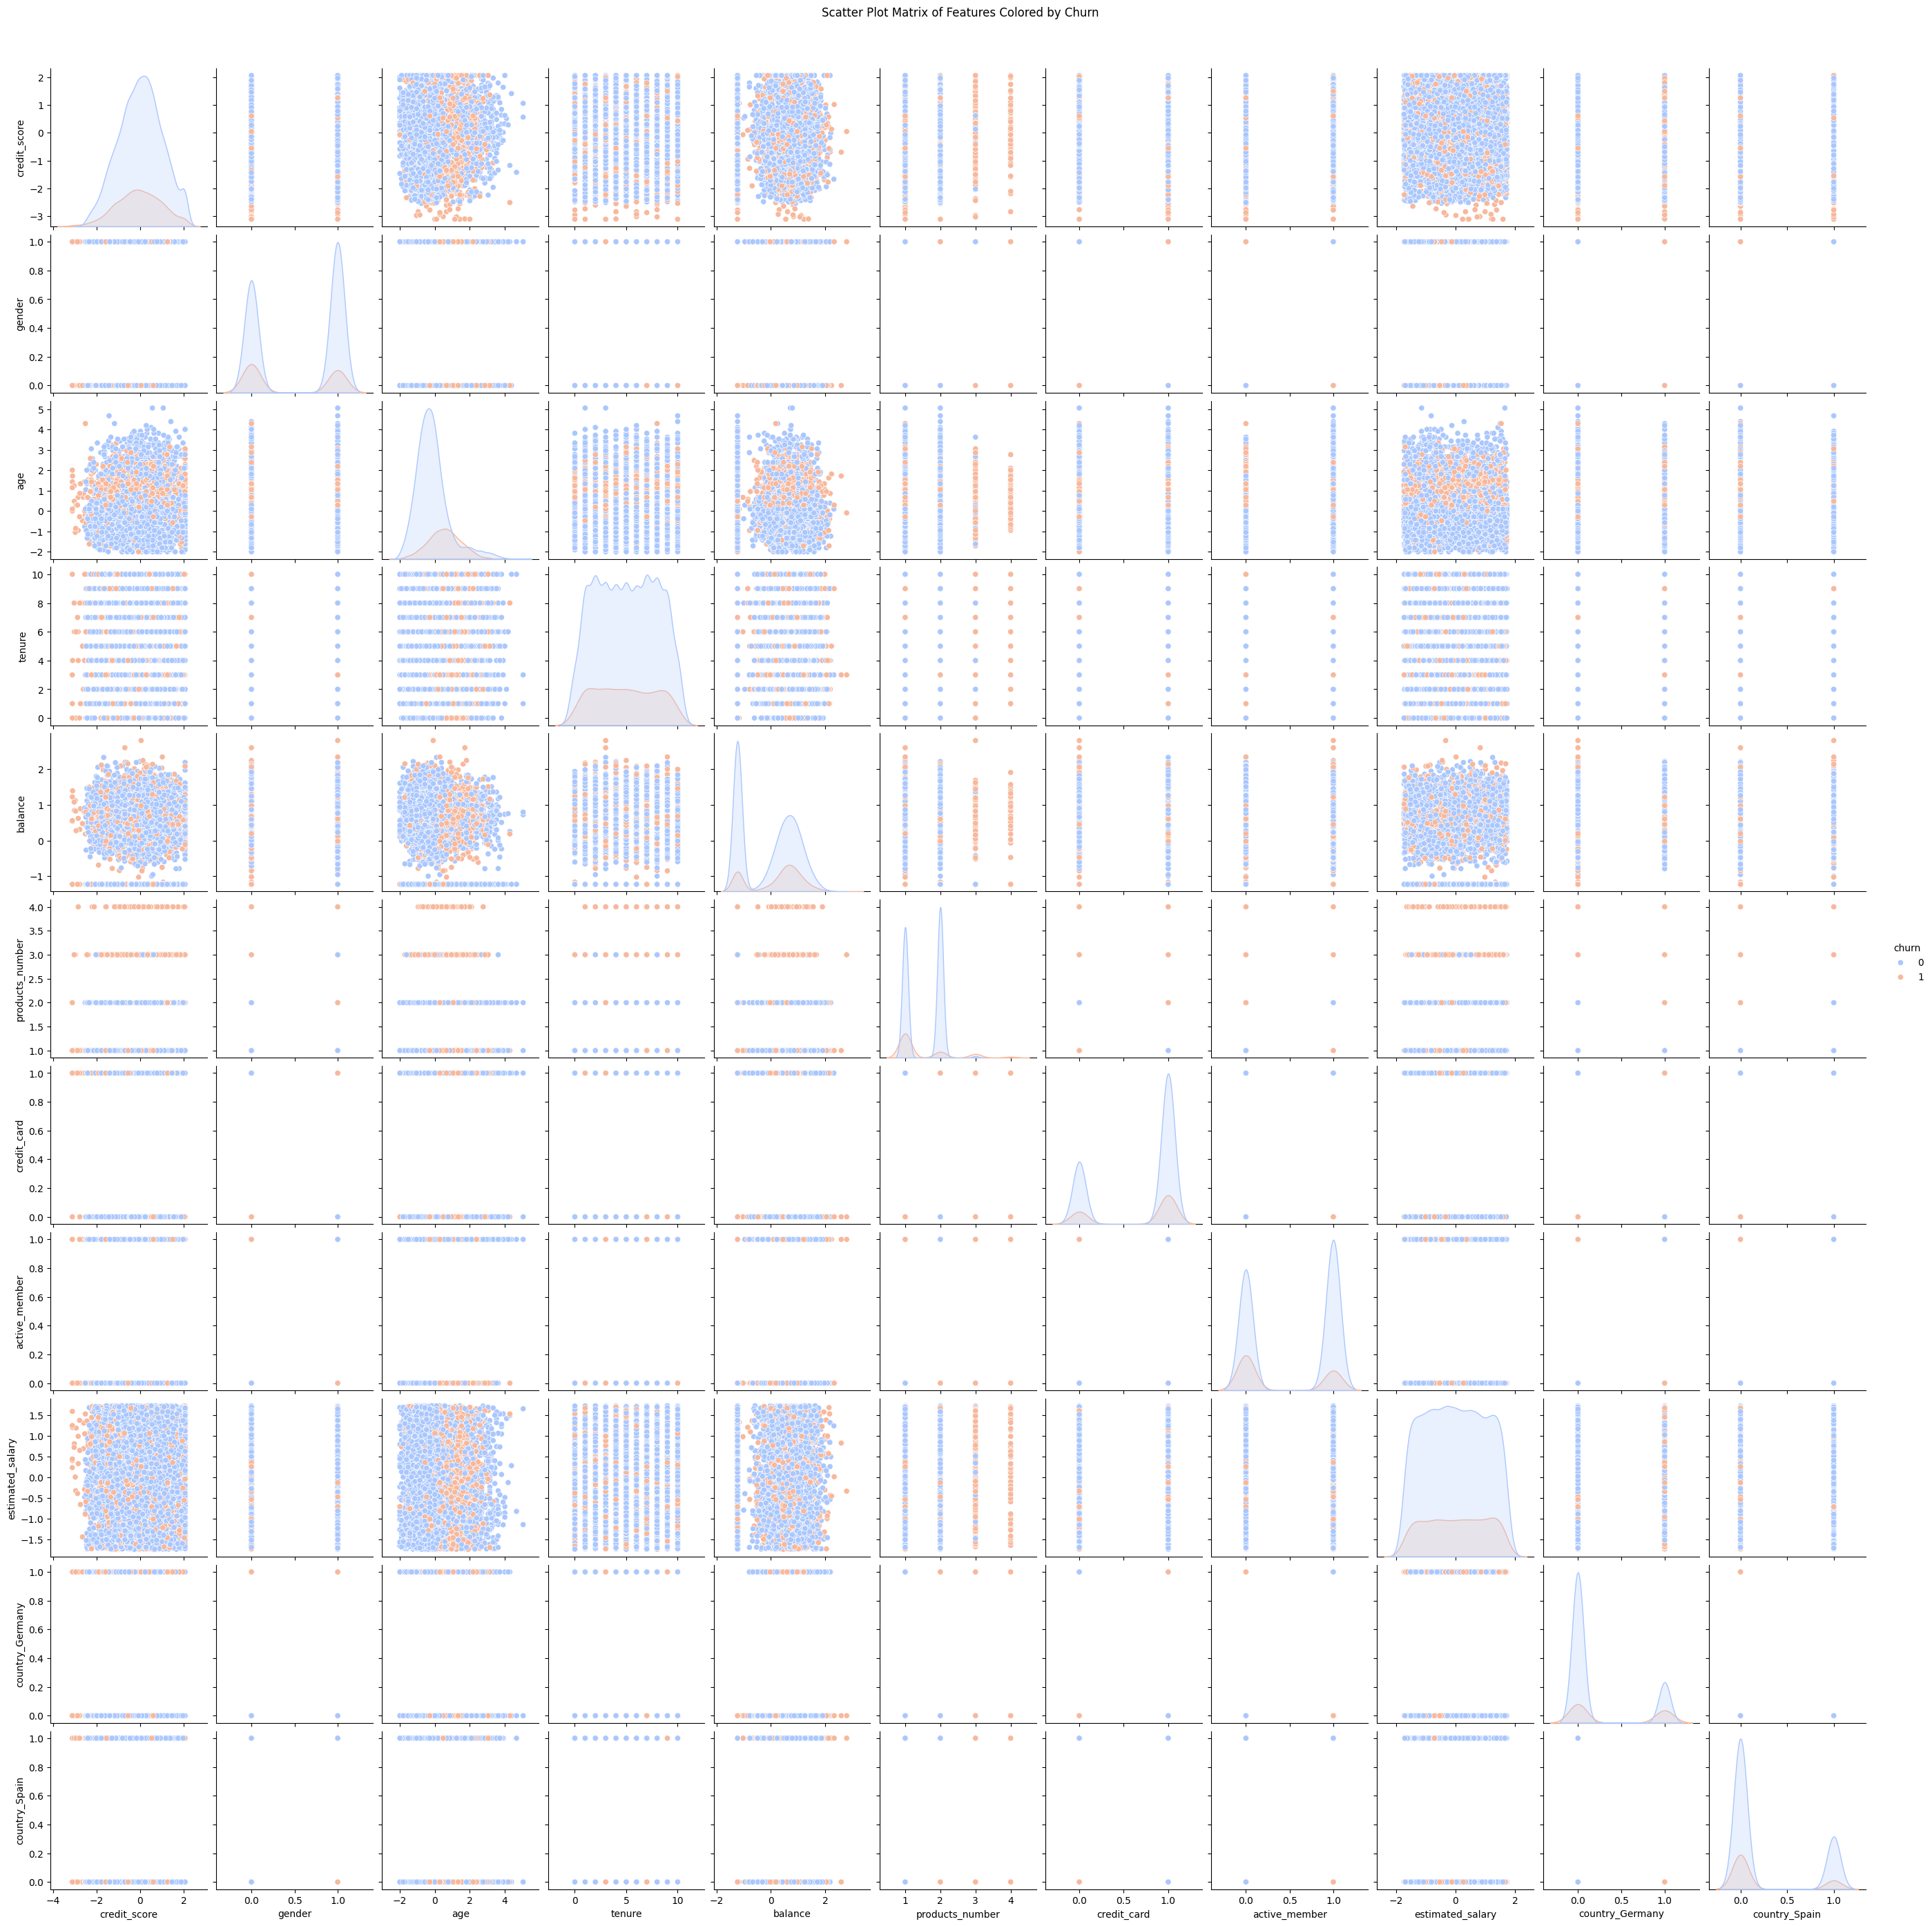

In [ ]:
plt.figure(figsize=(15, 15))  # Set the size of the entire figure
sns.pairplot(df, hue='churn', diag_kind='kde', palette='coolwarm')
plt.suptitle("Scatter Plot Matrix of Features Colored by Churn", y=1.02)  # Adjust title position
plt.show()

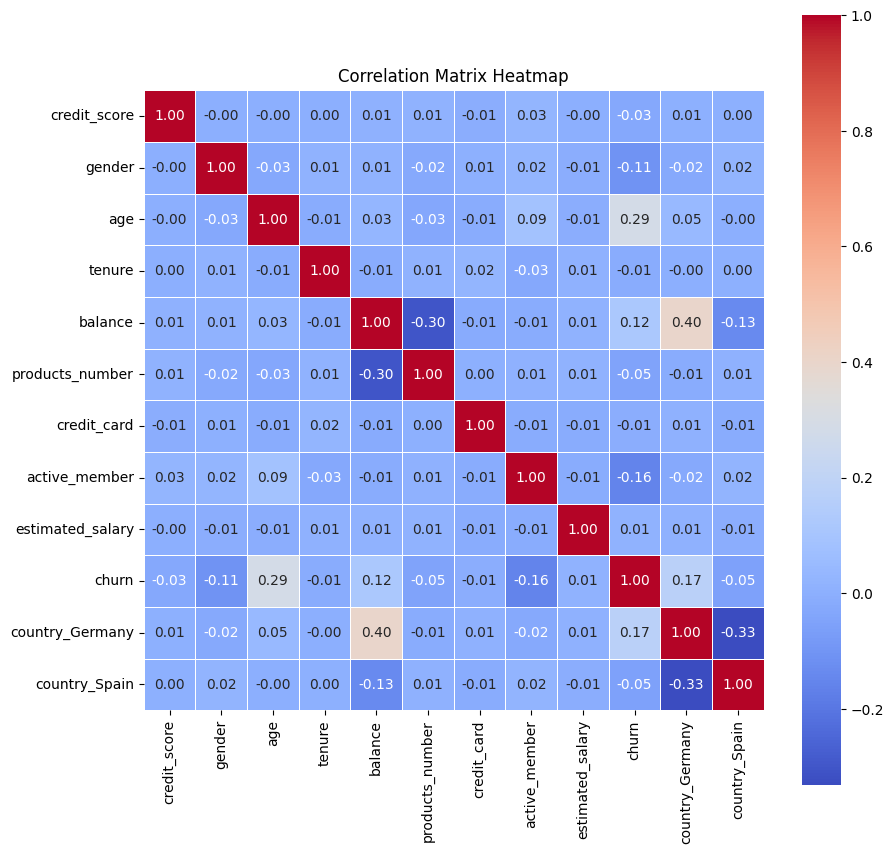

In [ ]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 10))
correlation_matrix = df.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()